In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train.shape

(60000, 28, 28)

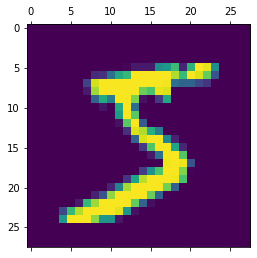

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
X_train=X_train/255
X_test=X_test/255

In [10]:
X_train_flattened=X_train.reshape(60000,784)
X_test_flattened=X_test.reshape(10000,784)

In [11]:
X_train_flattened.shape

(60000, 784)

In [12]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [45]:
model= keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
    
model.compile(
    optimizer='Adamax',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.6629 - accuracy: 0.8494
Epoch 2/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3818 - accuracy: 0.8991
Epoch 3/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3431 - accuracy: 0.9069
Epoch 4/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3245 - accuracy: 0.9112
Epoch 5/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3131 - accuracy: 0.9138


In [46]:
model.evaluate(X_test_flattened,y_test)

10000/10000 [==============================] - 1s 50us/sample - loss: 0.2964 - accuracy: 0.9202


[0.29638631573319435, 0.9202]

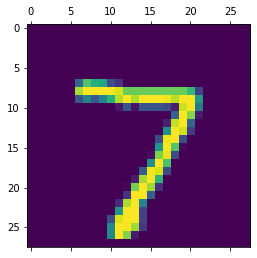

In [15]:
plt.matshow(X_test[0])

In [16]:
y_predicted=model.predict(X_test_flattened)
y_predicted[0]

array([1.09267285e-05, 1.03888453e-10, 4.57820170e-05, 8.03930033e-03,
       1.20592381e-06, 8.92843527e-05, 1.70890624e-09, 7.67065167e-01,
       6.51071605e-05, 7.48653372e-04], dtype=float32)

In [17]:
np.argmax(y_predicted[0])

7

In [18]:
y_test[0]

7

In [19]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [20]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [21]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [22]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    1,    2,    0,    6,   10,    3,    2,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   5,   10,  926,   15,    8,    4,   13,   11,   37,    3],
       [   2,    0,   20,  923,    0,   19,    2,   12,   25,    7],
       [   1,    1,    3,    1,  919,    0,   10,    3,   10,   34],
       [   8,    2,    2,   38,   12,  762,   18,    5,   39,    6],
       [   7,    3,    6,    1,    8,    7,  921,    2,    3,    0],
       [   2,    6,   24,    2,    8,    1,    0,  952,    2,   31],
       [   5,    8,    6,   18,    9,   23,    9,   12,  878,    6],
       [   9,    7,    1,   10,   26,    5,    0,   20,    9,  922]])>

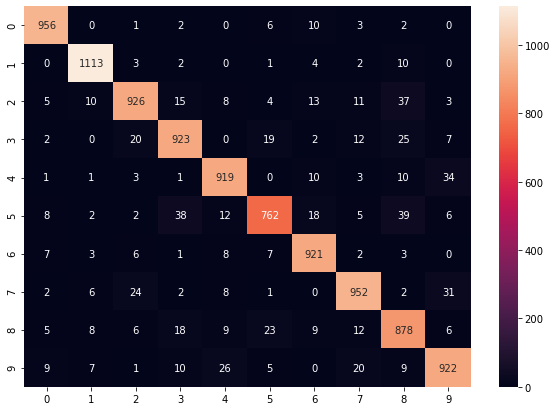

In [23]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [50]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
    
model.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2944 - accuracy: 0.9176
Epoch 2/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.1342 - accuracy: 0.9610
Epoch 3/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0967 - accuracy: 0.9707
Epoch 4/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0761 - accuracy: 0.9768
Epoch 5/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0606 - accuracy: 0.9813


In [26]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 53us/sample - loss: 0.0798 - accuracy: 0.9743


[0.07979289954276755, 0.9743]

In [27]:
y_pred=model.predict(X_test)

In [28]:
y_pred[0]

array([6.4140477e-07, 2.1114021e-08, 6.6058433e-06, 1.0945988e-03,
       1.7610345e-10, 3.6872362e-07, 2.7360924e-11, 7.6886517e-01,
       7.0637798e-06, 5.8513297e-06], dtype=float32)

In [29]:
np.argmax(y_pred[0])

7

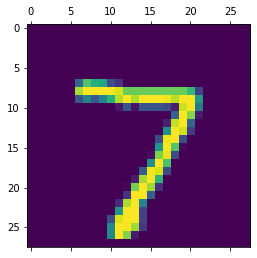

In [31]:
plt.matshow(X_test[0])

In [32]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [33]:
y_pred[:5]

array([[6.41404768e-07, 2.11140208e-08, 6.60584328e-06, 1.09459879e-03,
        1.76103451e-10, 3.68723619e-07, 2.73609243e-11, 7.68865168e-01,
        7.06377978e-06, 5.85132966e-06],
       [8.89051854e-09, 2.40089412e-05, 9.13303137e-01, 2.64402934e-05,
        8.65952857e-16, 9.05334105e-07, 6.60983401e-09, 4.08184701e-11,
        4.36781988e-07, 7.42786231e-14],
       [3.92424141e-07, 3.29963744e-01, 6.93644397e-05, 6.29699707e-06,
        2.57725078e-05, 2.96643270e-06, 1.43641628e-05, 4.18927026e-04,
        6.54225703e-04, 7.43011526e-07],
       [4.96699251e-02, 7.15933313e-10, 6.59896500e-07, 1.38315968e-07,
        9.52491686e-09, 2.51198173e-07, 5.03681576e-06, 6.82935990e-07,
        2.01317296e-09, 5.52877530e-08],
       [2.69161615e-06, 1.41325972e-06, 1.10579953e-04, 4.42548526e-07,
        1.67409763e-01, 7.68328107e-07, 1.38873565e-05, 4.17021685e-04,
        9.40934115e-06, 5.17668028e-04]], dtype=float32)

In [34]:
y_pred_labels=[np.argmax(j) for j in y_pred]

In [35]:
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [36]:
c_mat=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

In [37]:
c_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    2,    2,    0,    1,    3,    1,    1,    0],
       [   0, 1123,    4,    0,    0,    1,    2,    1,    4,    0],
       [   4,    1, 1000,    5,    2,    1,    4,    7,    8,    0],
       [   0,    0,    4,  995,    0,    3,    0,    1,    5,    2],
       [   3,    1,    3,    1,  947,    1,   10,    4,    1,   11],
       [   2,    0,    0,   18,    1,  852,    6,    2,   10,    1],
       [   4,    3,    1,    1,    1,    2,  941,    0,    5,    0],
       [   2,    2,    7,    5,    0,    1,    0, 1006,    2,    3],
       [   1,    0,    2,    8,    2,    6,    2,    4,  948,    1],
       [   3,    4,    0,    8,    8,    1,    1,   14,    9,  961]])>

TypeError: 'str' object is not callable

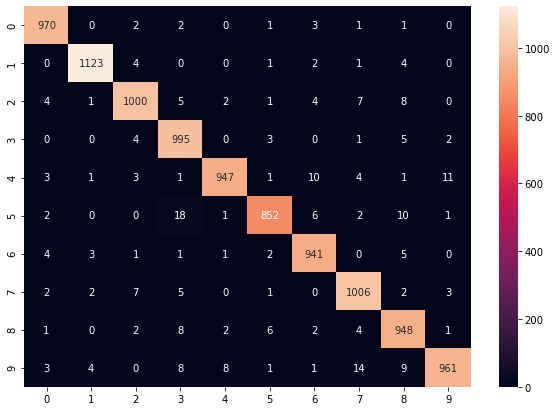

In [44]:
plt.figure(figsize=(10,7))
sns.heatmap(c_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')